<a href="https://colab.research.google.com/github/verschadel/verschadel/blob/main/Game%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing the data

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset

sheet_url = 'https://docs.google.com/spreadsheets/d/1htAw6OB7yOhfRjyGJztb5wulLEX5QYffYYPSJNp0ltM/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1htAw6OB7yOhfRjyGJztb5wulLEX5QYffYYPSJNp0ltM/export?format=csv&gid1485085913


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
df.shape

(177, 7)

In [ ]:
df.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [ ]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [ ]:
#save raw data for back up
df_cleaned = df.copy()

In [ ]:
# change data release to datetime

df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


# Which game is the oldest and the newest in this dataset

In [ ]:
#Sort data frame by date

df_cleaned.sort_values(by='Release')

,Name,Sales,Series,Release,Genre,Developer,Publisher
133,Hydlide,1.0,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software,Technology and Entertainment Software
34,Where in the World Is Carmen Sandiego?,4.0,Carmen Sandiego,1985-06-01,Educational,Broderbund,Broderbund
88,International Karate,1.5,International Karate,1985-11-01,Fighting,System 3,Epyx
162,Tetris,1.0,Tetris,1988-01-01,Puzzle,Spectrum HoloByte,Spectrum HoloByte
22,Last Ninja 2,5.5,The Last Ninja,1988-08-01,Action-adventure,System 3,Activision
...,...,...,...,...,...,...,...
139,Mordhau,1.0,NaN,2019-04-01,Action,Triternion,Triternion
10,Fall Guys,10.0,NaN,2020-08-01,Battle royale,Mediatonic,Devolver Digital
110,Crusader Kings III,1.0,Crusader Kings,2020-09-01,Grand strategy,Paradox Development Studio,Paradox Interactive
27,Cyberpunk 2077,4.5,NaN,2020-12-01,Action role-playing,CD Projekt Red,CD Projekt


In [ ]:
agg_release = df_cleaned.groupby('Release', as_index=False)['Name', 'Series'].sum()
print(agg_release)

       Release                                    Name                Series
0   1984-12-01                                 Hydlide               Hydlide
1   1985-06-01  Where in the World Is Carmen Sandiego?       Carmen Sandiego
2   1985-11-01                    International Karate  International Karate
3   1988-01-01                                  Tetris                Tetris
4   1988-08-01                            Last Ninja 2        The Last Ninja
..         ...                                     ...                   ...
125 2019-04-01                                 Mordhau                     0
126 2020-08-01                               Fall Guys                     0
127 2020-09-01                      Crusader Kings III        Crusader Kings
128 2020-12-01                          Cyberpunk 2077                     0
129 2021-02-01                                 Valheim                     0

[130 rows x 3 columns]


<ipython-input-44-0f479973f093>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_release = df_cleaned.groupby('Release', as_index=False)['Name', 'Series'].sum()


Hydlide. released in 1984 is the oldest game in this dataset. And Valheim is the newest game in this data set released in 2021.

# Which publisher publish most of the game

In [ ]:
# Group by publisher and name, then count the number of entries
publisher_counts = df.groupby('Publisher')['Name'].count()

# Sort the result by the most published
sorted_publisher_counts = publisher_counts.sort_values(ascending=False)

# Select the top 10 publishers
top_10_publishers = sorted_publisher_counts.head(10)
print(top_10_publishers)


Publisher
Electronic Arts            19
Blizzard Entertainment     10
Paradox Interactive         7
Activision                  6
GT Interactive              5
Microsoft                   4
Capcom                      4
Gathering of Developers     4
CD Projekt                  3
THQ                         3
Name: Name, dtype: int64


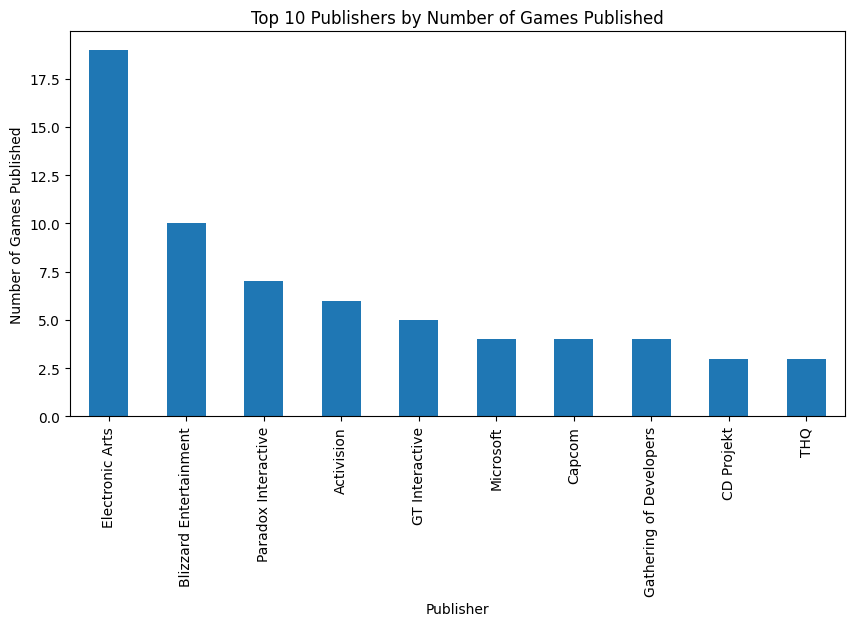

In [ ]:
# Plot the top 10 values
top_10_publishers.plot(kind='bar')

# Add labels and title
plt.xlabel('Publisher')
plt.ylabel('Number of Games Published')
plt.title('Top 10 Publishers by Number of Games Published')

# Show the plot
plt.show()

The bar graph clearly shows the publisher who publish most of the game which is Electronic Arts, makiing a total of 19 games

# Which Developer develop most of the game

In [ ]:
# Group by publisher and name, then count the number of entries
developer_counts = df.groupby('Developer')['Name'].count()

# Sort the result by the most published
sorted_developer_counts = developer_counts.sort_values(ascending=False)

# Select the top 10 publishers
top_10_developer = sorted_developer_counts.head(10)
print(top_10_developer)

Developer
Blizzard Entertainment        10
Maxis                          6
Paradox Development Studio     5
id Software                    4
Westwood Studios               4
Valve                          4
Ensemble Studios               4
CD Projekt Red                 4
Capcom                         4
System 3                       3
Name: Name, dtype: int64


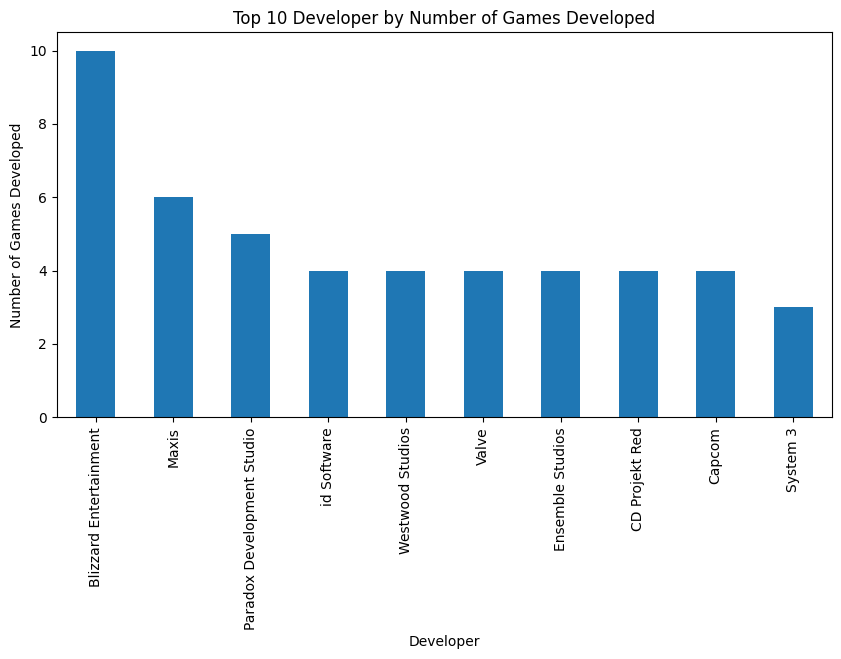

In [ ]:
# Plot the top 10 values
top_10_developer.plot(kind='bar')

# Add labels and title
plt.xlabel('Developer')
plt.ylabel('Number of Games Developed')
plt.title('Top 10 Developer by Number of Games Developed')

# Show the plot
plt.show()

Looking at the bar plot, we can clearly see that Blizzard Entertainment has developed 10 games. which makes blizzard entertaintment is developer who develop most of the game in this dataset.

# Which series has the most sales

In [ ]:
# Group by series and sum the sales
series_sales = df.groupby('Series')['Sales'].sum()

# Sort the result by the most sales
sorted_series_sales = series_sales.sort_values(ascending=False)

# Select the top 5 series
top_5_series = sorted_series_sales.head(5)

print(top_5_series)

Series
Minecraft    33.0
Diablo       26.0
The Sims     24.0
Half-Life    21.0
StarCraft    21.0
Name: Sales, dtype: float64


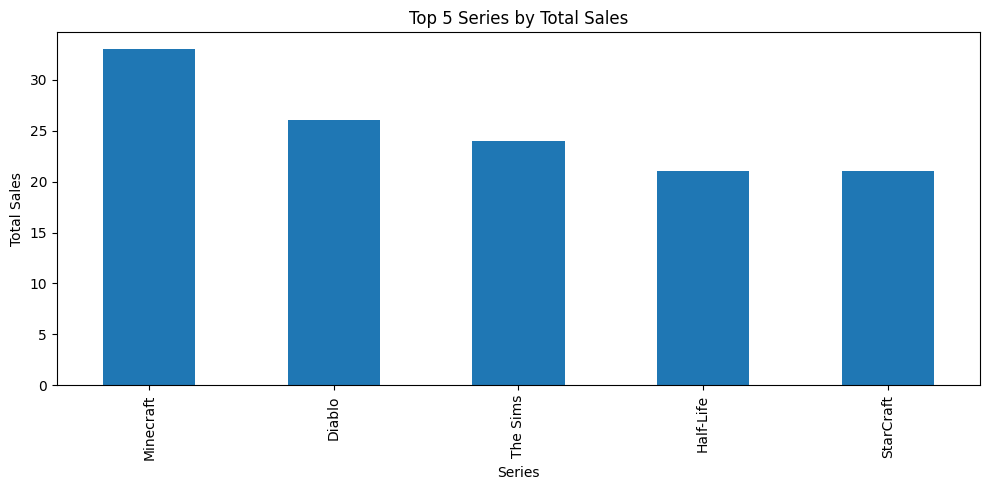

In [ ]:
# Plot the top 5 values
top_5_series.plot(kind='bar')

# Add labels and title
plt.xlabel('Series')
plt.ylabel('Total Sales')
plt.title('Top 5 Series by Total Sales')

# Show the plot
plt.tight_layout()
plt.show()

Based on the bar plot above, we can see that Minecraft is a series that has the highest sales of 33 million. 

# Which series have the most game

In [ ]:
# Group by series and count the number of games
series_games = df.groupby('Series')['Name'].count()

# Sort the result by the most games
sorted_series_games = series_games.sort_values(ascending=False)

print(sorted_series_games)

Series
StarCraft               6
Command & Conquer       5
Age of Empires          4
Civilization            4
Dark Souls              3
                       ..
International Karate    1
Hydlide                 1
Hearts of Iron          1
Harry Potter            1
Zork                    1
Name: Name, Length: 91, dtype: int64


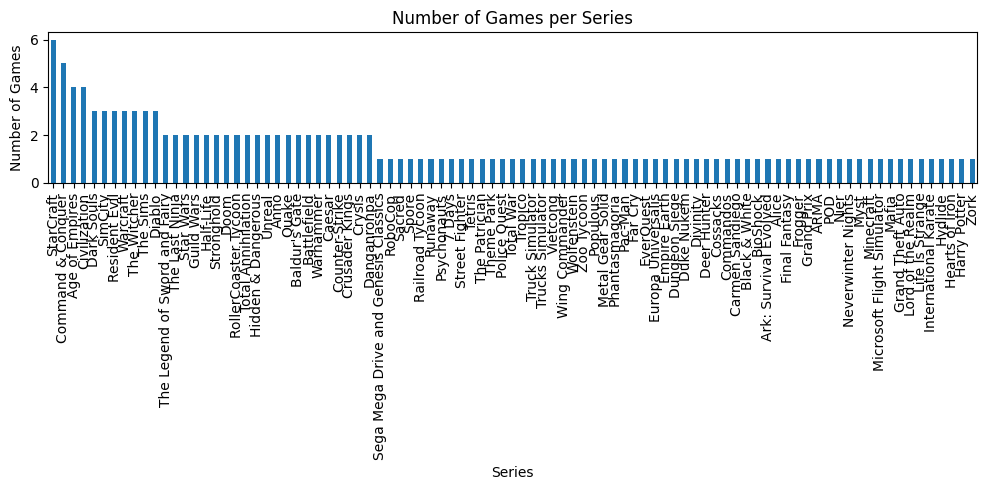

In [ ]:
# Plot the data
sorted_series_games.plot(kind='bar')

# Add labels and title
plt.xlabel('Series')
plt.ylabel('Number of Games')
plt.title('Number of Games per Series')

# Show the plot
plt.tight_layout()
plt.show()

Starcraft is the series who have most of the games in this data set, from the bar graph we can see that Starcraft a total of 6 games.